In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv(r"C:\Users\afiroz\Downloads\WineQT.csv")

In [4]:
df.shape

(1143, 13)

In [5]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
#dropping the id column as it was unnecessary
df.drop(columns='Id',axis=1,inplace = True)

In [11]:
df.shape

(1143, 12)

In [12]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
#checking if there is any missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# Stastical measures
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


C:\Users\afiroz\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


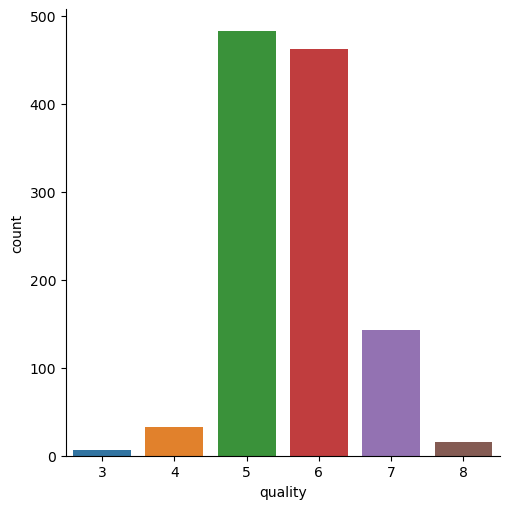

In [19]:
# Number of values for each quality check

sns.catplot(x='quality',data=df,kind='count')
plt.show()


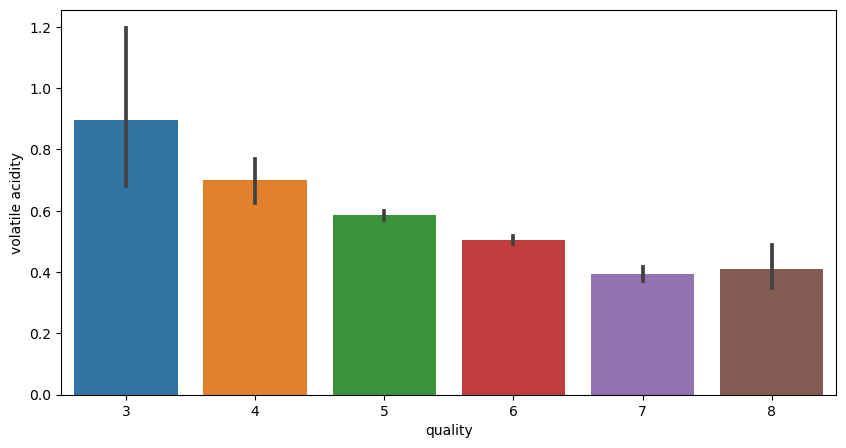

In [21]:
# volatile acidity vs quality
plot = plt.figure(figsize =(10,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)
plt.show()

# volatile acidity is inversely proportional to quality

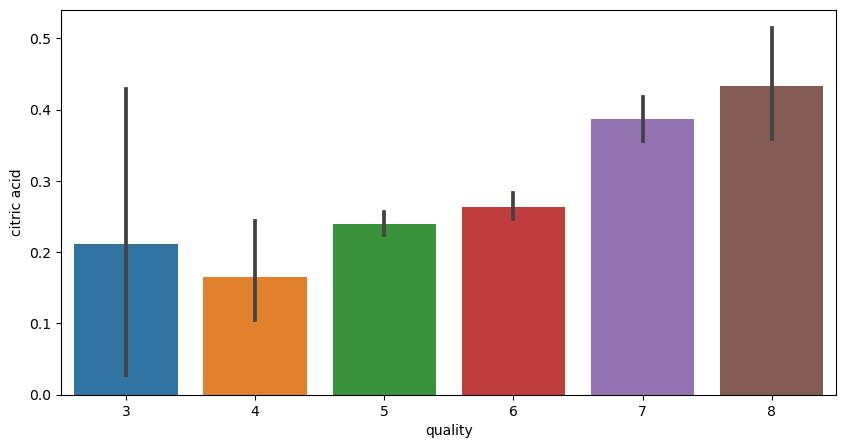

In [25]:
# citric acid vs quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='citric acid',data=df)
plt.show()

# Citric acid is proportional to quality

In [26]:
# Correlation
cor=df.corr()

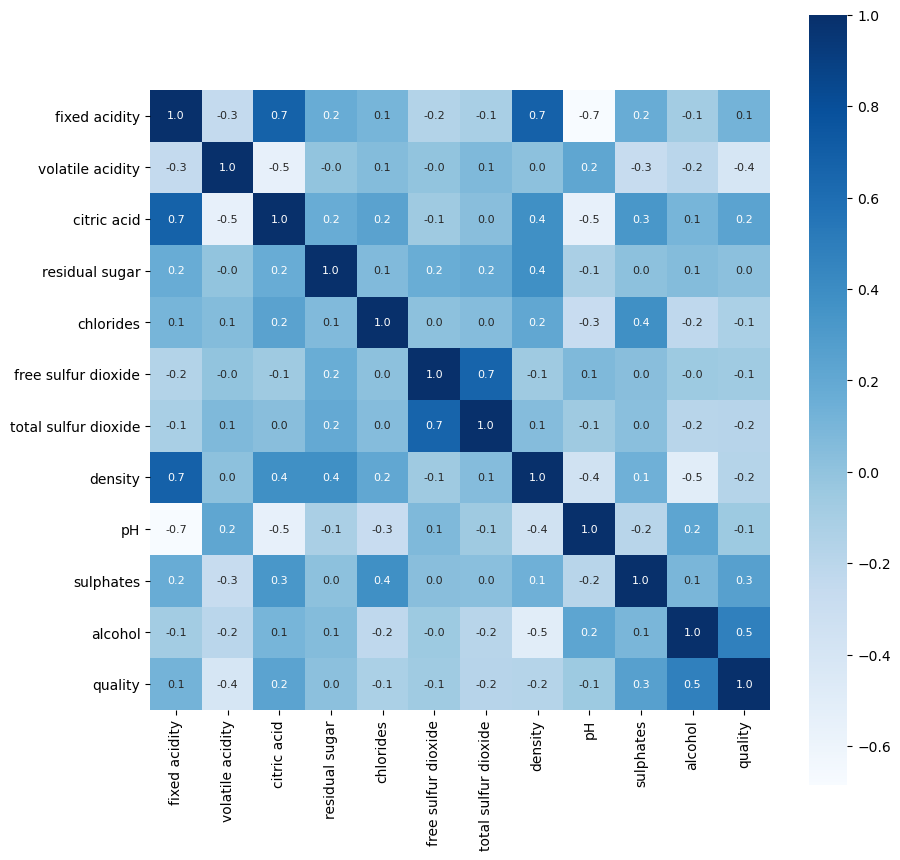

In [32]:
# Constructing a heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(cor, cbar = True, square = True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

In [53]:
# Data pre-processing
#separating the datas
x = df.drop(columns='quality',axis = 1)

In [54]:
x.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [66]:
# label Binarization
Y = df['quality'].apply(lambda y_value:1 if y_value>=7 else 0 ) # 1 is good and 0 is not good

In [70]:
df['quality'].head(10)

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

In [67]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int64

In [71]:
#Train and Test data
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=2)

In [72]:
print(Y.shape,y_test.shape,y_train.shape)

(1143,) (229,) (914,)


In [73]:
# random forest classifier model
model = RandomForestClassifier()

In [74]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [75]:
# Accuracy score
X_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [76]:
print("Accuracy:", test_data_accuracy)

Accuracy: 0.9213973799126638


In [85]:
# Building a predictive system for good wine
inp_dat = (5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566666666666698)

#changing the input data into numpy array
arr = np.asarray(inp_dat)
#reshape
reshaped=arr.reshape(1,-1)

predic = model.predict(reshaped)
print(predic)

[1]


C:\Users\afiroz\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [86]:
# Building a predictive system for bad wine
inp_dat = (5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.9954700000000001,3.57,0.71,10.2)

#changing the input data into numpy array
arr = np.asarray(inp_dat)
#reshape
reshaped=arr.reshape(1,-1)

predic = model.predict(reshaped)
print(predic)

[0]


C:\Users\afiroz\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [84]:
Y.value_counts()

quality
0    984
1    159
Name: count, dtype: int64